In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from clean_dataset import import_csv_data

In [2]:
file_path = 'data\immoweb-dataset.csv'
raw_df = import_csv_data(file_path)
raw_df


,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80363,440319,20663057.0,https://www.immoweb.be/en/classified/villa/for...,HOUSE,VILLA,3.0,1.0,Antwerp,Willebroek,2830,...,NaN,3.0,True,NaN,True,NaN,NaN,NaN,B,849000.0
80364,440364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,...,NaN,1.0,NaN,NaN,True,10.0,NaN,NaN,D,279000.0
80365,440966,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,...,NaN,1.0,NaN,NaN,True,9.0,NaN,NaN,B,299000.0
80366,442237,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,...,NaN,2.0,NaN,NaN,True,NaN,NaN,NaN,A,325000.0


#### Change columns names

In [ ]:
raw_df.columns

In [ ]:
def join_column_names(df:pd) -> None:
    columns_new_names = dict()
    for column in df.columns:
        s = "_".join(column.split())
        if s != column:
            columns_new_names[column] = s

    df.rename(columns=columns_new_names, inplace=True)

In [ ]:
join_column_names(raw_df)

#### Duplicates

In [3]:
raw_df[raw_df.duplicated()]

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price


In [4]:
len(raw_df)

80368

In [5]:
raw_df.drop_duplicates(subset=['id'], inplace=True)

In [6]:
len(raw_df)

80367

In [7]:
raw_df.head()

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0


In [8]:
how_many_na = raw_df.isna().sum()
how_many_na

Unnamed: 0                      0
id                              0
url                             0
type                            0
subtype                         0
bedroomCount                 6810
bathroomCount               13696
province                        0
locality                        0
postCode                        0
habitableSurface            12585
roomCount                   58420
monthlyCost                 80367
hasAttic                    67852
hasBasement                 51052
hasDressingRoom             77739
diningRoomSurface           73467
hasDiningRoom               66227
buildingCondition           22376
buildingConstructionYear    31262
facedeCount                 27129
floorCount                  42822
streetFacadeWidth           64858
hasLift                     61323
floodZoneType               35902
heatingType                 33214
hasHeatPump                 72895
hasPhotovoltaicPanels       72319
hasThermicPanels            77255
kitchenSurface

In [9]:
threshold = len(raw_df)*0.8
threshold

64293.600000000006

In [10]:
def identify_missing_cols(df, threshold):
    missing_col ={}
    lenght_df = len(df)
    for column in df.columns:
        number_nan = df[column].isna().sum()
        if number_nan < threshold:
            missing_col[column] = number_nan/lenght_df
        
    return missing_col

In [12]:
df_wo_null_price = raw_df[~raw_df['price'].isna()]
df_wo_null_price

,Unnamed: 0,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,...,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,accessibleDisabledPeople,epcScore,price
0,0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,7.0,NaN,NaN,C,399000.0
1,1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,...,True,3.0,NaN,NaN,True,1.0,NaN,NaN,E,895000.0
2,2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,True,2.0,NaN,NaN,F,465000.0
3,3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,...,NaN,2.0,NaN,NaN,True,3.0,NaN,NaN,B,590000.0
4,4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80362,380220,20379774.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,East Flanders,Maldegem,9990,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,649000.0
80364,440364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,...,NaN,1.0,NaN,NaN,True,10.0,NaN,NaN,D,279000.0
80365,440966,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,...,NaN,1.0,NaN,NaN,True,9.0,NaN,NaN,B,299000.0
80366,442237,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,...,NaN,2.0,NaN,NaN,True,NaN,NaN,NaN,A,325000.0


In [13]:
df_wo_null_price.drop(columns= ['Unnamed: 0', 'accessibleDisabledPeople'], inplace = True)
df_wo_null_price

C:\Users\herms\AppData\Local\Temp\ipykernel_26684\823892569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_null_price.drop(columns= ['Unnamed: 0', 'accessibleDisabledPeople'], inplace = True)


,id,url,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,...,True,NaN,1.0,NaN,NaN,True,7.0,NaN,C,399000.0
1,20647642.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,...,NaN,True,3.0,NaN,NaN,True,1.0,NaN,E,895000.0
2,20644816.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,...,NaN,NaN,1.0,NaN,NaN,True,2.0,NaN,F,465000.0
3,20659813.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,...,True,NaN,2.0,NaN,NaN,True,3.0,NaN,B,590000.0
4,20633249.0,https://www.immoweb.be/en/classified/flat-stud...,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80362,20379774.0,https://www.immoweb.be/en/classified/house/for...,HOUSE,HOUSE,4.0,2.0,East Flanders,Maldegem,9990,242.0,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,649000.0
80364,20664347.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,...,True,NaN,1.0,NaN,NaN,True,10.0,NaN,D,279000.0
80365,20664354.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,1.0,Flemish Brabant,Grimbergen Strombeek-Bever,1853,113.0,...,NaN,NaN,1.0,NaN,NaN,True,9.0,NaN,B,299000.0
80366,20664377.0,https://www.immoweb.be/en/classified/apartment...,APARTMENT,APARTMENT,3.0,2.0,West Flanders,Westende,8434,111.0,...,NaN,NaN,2.0,NaN,NaN,True,NaN,NaN,A,325000.0


In [21]:
print(df_wo_null_price.groupby('type')['hasSwimmingPool'].describe())

          count unique   top  freq
type                              
APARTMENT   246      1  True   246
HOUSE      1569      1  True  1569


In [38]:
w_out_pool = df_wo_null_price.groupby('hasSwimmingPool')['price'].mean()
print(w_out_pool)

hasSwimmingPool
False    4.265138e+05
True     1.313784e+06
Name: price, dtype: float64


<Axes: xlabel='hasSwimmingPool', ylabel='price'>

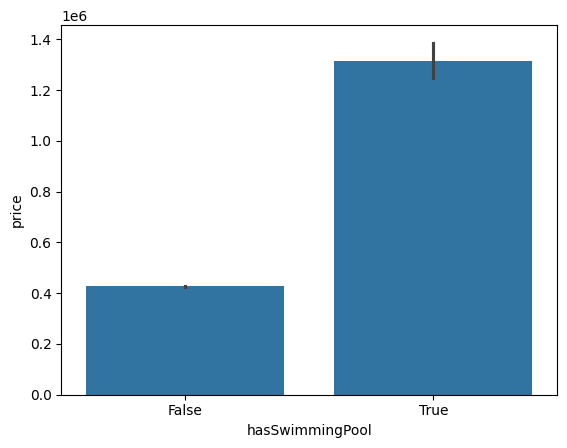

In [36]:
sns.barplot(data = df_wo_null_price, x = 'hasSwimmingPool', y = 'price' )

In [39]:
w_out_panels = df_wo_null_price.groupby('hasPhotovoltaicPanels')['price'].mean()
print(w_out_panels)

hasPhotovoltaicPanels
False    440983.576660
True     503775.658673
Name: price, dtype: float64


<Axes: xlabel='hasPhotovoltaicPanels', ylabel='price'>

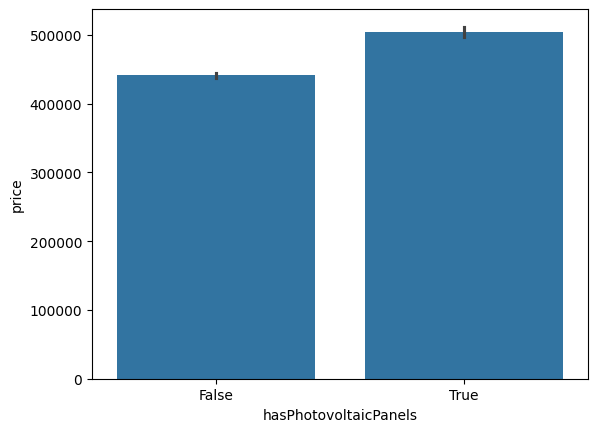

In [37]:
sns.barplot(data = df_wo_null_price, x = 'hasPhotovoltaicPanels', y = 'price' )

In [ ]:
cols_less_threshold = identify_missing_cols(df_wo_null_price, threshold)
print(f"Total number of attribtues: {len(cols_less_threshold )}\n")

print("Printing all values dif than 0")
for k,v in cols_less_threshold.items():
    
    
    print(k,v)

In [ ]:
df_wo_null_price.columns

In [ ]:
df_wo_null_price.isna()

In [41]:
bool_columns = ['hasAttic',
'hasBasement', 
'hasDressingRoom',
'hasDiningRoom' ,
'hasLift',
'hasHeatPump',
'hasPhotovoltaicPanels',
'hasThermicPanels',
'hasBalcony',
'hasGarden',
'hasAirConditioning',
'hasArmoredDoor',
'hasVisiophone',
'hasOffice',
'hasSwimmingPool',
'hasFireplace',
'hasLivingRoom']

In [46]:
for bool_col in bool_columns:
    w_out_ = df_wo_null_price.groupby(bool_col)['price'].mean()
    print(w_out_)

hasAttic
False    452210.980284
True     424074.249580
Name: price, dtype: float64
hasBasement
False    438871.227622
True     461614.333402
Name: price, dtype: float64
hasDressingRoom
False    440106.567174
True     657887.013699
Name: price, dtype: float64
hasDiningRoom
False    434908.593723
True     503467.869996
Name: price, dtype: float64
hasLift
False    438955.802917
True     473625.221026
Name: price, dtype: float64
hasHeatPump
False    438801.949025
True     528732.275161
Name: price, dtype: float64
hasPhotovoltaicPanels
False    440983.576660
True     503775.658673
Name: price, dtype: float64
hasThermicPanels
False    443769.278158
True     537795.447301
Name: price, dtype: float64
hasBalcony
False    447600.799303
Name: price, dtype: float64
hasGarden
False    435483.929038
True     493477.991790
Name: price, dtype: float64
hasAirConditioning
False    443827.363926
True     700437.770258
Name: price, dtype: float64
hasArmoredDoor
False    435831.818376
True     678943.88341

In [42]:
len(bool_columns)

17

In [ ]:
for column in bool_columns:

    print( df_wo_null_price[column].value_counts())

In [ ]:
df_wo_null_price.isna().sum()

#### Imputting values for the bool columns

In [26]:
for column in bool_columns:
    df_wo_null_price[column].fillna(value = False, inplace=True)

C:\Users\herms\AppData\Local\Temp\ipykernel_26684\3929086686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_wo_null_price[column].fillna(value = False, inplace=True)
C:\Users\herms\AppData\Local\Temp\ipykernel_26684\3929086686.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wo_null_price[column].

## Old

#### Bedroom

In [ ]:
raw_df['bedroom'].describe()


In [ ]:
# Null values
number_of_nan_bedrooms = len(raw_df[raw_df['bedroom'].isna()])
number_of_nan_bedrooms

#### Bathroom

In [ ]:
raw_df['bathroom'].describe()

In [ ]:
number_of_nan_bathrooms = len(raw_df[raw_df['bathroom'].isna()])
number_of_nan_bathrooms

#### Garage

In [ ]:
raw_df['garage'].describe()

In [ ]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

##### Replace NaN elements with 0's

In [ ]:
raw_df['garage'].fillna(0,inplace=True)

In [ ]:
number_of_nan_garage = len(raw_df[raw_df['garage'].isna()])
number_of_nan_garage 

In [ ]:
join_column_names(raw_df)

#### Garden

In [ ]:
raw_df['garden'].describe()

In [ ]:
number_of_nan_garden = len(raw_df[raw_df['garden'].isna()])
number_of_nan_garden

#### EPC

In [ ]:
raw_df['EPC(kWh/m²)'].describe()

In [ ]:
number_of_nan_EPC = len(raw_df[raw_df['EPC(kWh/m²)'].isna()])
number_of_nan_EPC

#### Renovation Obligation

In [ ]:
raw_df['renovation obligation'].describe()


In [ ]:
number_of_nan_ren = len(raw_df[raw_df['renovation obligation'].isna()])
number_of_nan_ren

#### Year Built

In [ ]:
raw_df['year_built'].describe()


In [ ]:
number_of_nan_year= len(raw_df[raw_df['year_built'].isna()])
number_of_nan_year

#### Mobiscore

In [ ]:
raw_df['mobiscore'].describe()


In [ ]:
number_of_nan_mobi = len(raw_df[raw_df['mobiscore'].isna()])
number_of_nan_mobi

In [ ]:
sns.lmplot(x='mobiscore', y='price', data=raw_df.head(500)) 

In [ ]:
correlation = raw_df['price'].corr(raw_df['mobiscore'])
print("Correlation:", correlation)

### Work on the dataset

#### Change category type

In [ ]:
raw_df['postcode'] = raw_df['postcode'].astype('category')

In [ ]:
sns.swarmplot(x='postcode', y='mobiscore', data=raw_df.head(50)) 



#### Checking attributes types

In [ ]:
raw_df.dtypes

#### Check to see if several attributes have NaN values

In [ ]:
## Drop these records
raw_df[raw_df[['bedroom']].isna().all(axis=1)]

In [ ]:

raw_df[raw_df[['bedroom', 'bathroom']].isna().all(axis=1)]

In [ ]:
raw_df[raw_df[['EPC(kWh/m²)', 'renovation_obligation', 'year_built']].isna().all(axis=1)]

In [ ]:
correlation = raw_df['bedroom'].corr(raw_df['living_area(m²)'])
print("Correlation:", correlation)

#### Dropping the url columns

In [ ]:
clean_df = raw_df.drop(columns={'url'})

In [ ]:
raw_df['price'].mean()

### Comparing attributes with price

In [ ]:
df_n_bedrooms = raw_df[~raw_df[['bedroom']].isna().all(axis=1)]

In [ ]:
avg_price_before = df_n_bedrooms['price'].mean()
avg_price_before

#### Excluding EPC

In [ ]:
corr_EPC = df_n_bedrooms['price'].corr(df_n_bedrooms['EPC(kWh/m²)'])
print(f"Correlation between EPC and price {corr_EPC}")

In [ ]:
df_n_bedrooms[df_n_bedrooms['EPC(kWh/m²)'].notna()]['price'].mean()

In [ ]:
df_n_EPC = df_n_bedrooms[~df_n_bedrooms[['EPC(kWh/m²)']].isna().all(axis=1)]
print(f"Average without EPC attribute {df_n_EPC['price'].mean()}")

#### Excluding year_built

In [ ]:
df_n_year = df_n_bedrooms[~df_n_bedrooms[['year_built']].isna().all(axis=1)]
print(f"Average without year_built attribute {df_n_year['price'].mean()}")

#### Excluding renovation_obligation

In [ ]:
df_n_ren = df_n_bedrooms[~df_n_bedrooms[['renovation_obligation']].isna().all(axis=1)]
print(f" Average without renovation_obligation attribute {df_n_ren['price'].mean()}")


In [ ]:
df_n_mobi = df_n_bedrooms[~df_n_bedrooms[['mobiscore']].isna().all(axis=1)]
print(f" Average without mobiscore attribute {df_n_mobi['price'].mean()}")


In [ ]:
sns.scatterplot(x='living_area(m²)', y='price', data = df_n_bedrooms.head(1000))